In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def pointtriangle(x0,x1,y0,y1,j):
    C = np.array([[-np.tan(np.deg2rad(120+j*60)),1],[-np.tan(np.deg2rad(60+60*j)),1]])
    V = np.array([y1-(np.tan(np.deg2rad(120+j*60))*x1),y0-(np.tan(np.deg2rad(60+60*j))*x0)])
    
    return np.linalg.solve(C,V)

In [3]:
def kochsplitp2(p1,p5):
    p2 = np.sum([np.multiply(p1,2),p5],axis=0)/3
    return p2
def kochsplitp4(p1,p5):
    p4 = np.sum([p1,np.multiply(p5,2)],axis=0)/3
    return p4

In [4]:
def rotatevector(x0,x1,y0,y1):
    Rm = np.array([[np.cos(np.deg2rad(60)),-np.sin(np.deg2rad(60))],[np.sin(np.deg2rad(60)),np.cos(np.deg2rad(60))]])
    Point = [x0,y0] + np.dot(Rm,np.subtract([x1,y1],[x0,y0]))
    return Point

In [5]:
def kochcurve1(N):
    kocharrayx = [0,1]
    kocharrayy = [0,0]
    for times in range(N):
        linecount = len(kocharrayx)-1
        for j in range(linecount): # slide the line to 3 equal line 
            P1 = [kocharrayx[j+3*j],kocharrayy[j+3*j]]
            P4 = [kocharrayx[j+1+3*j],kocharrayy[j+1+3*j]]
            
            kocharrayx.insert(j+1+j*3,kochsplitp2(P1,P4)[0])#(np.sum([P4,P1],axis=0)/3
            kocharrayx.insert(j+2+j*3,kochsplitp4(P1,P4)[0])#((np.sum([P4,P1],axis=0)/3)*2)
            
            kocharrayy.insert(j+1+3*j,kochsplitp2(P1,P4)[1])#(np.sum([P4,P1],axis=0)/3)
            kocharrayy.insert(j+2+3*j,kochsplitp4(P1,P4)[1])#((np.sum([P4,P1],axis=0)/3)*2)
            
            newpointtriangle = pointtriangle(kocharrayx[j+1+3*j],kocharrayx[j+2+3*j],kocharrayy[j+1+3*j],kocharrayy[j+2+3*j],j)    
            kocharrayx.insert(j+2+3*j,newpointtriangle[0])
            kocharrayy.insert(j+2+3*j,newpointtriangle[1])

    return kocharrayx,kocharrayy

In [6]:
kochcurve1(1)

([0, 0.3333333333333333, 0.5000000000000001, 0.6666666666666666, 1],
 [0, 0.0, 0.2886751345948129, 0.0, 0])

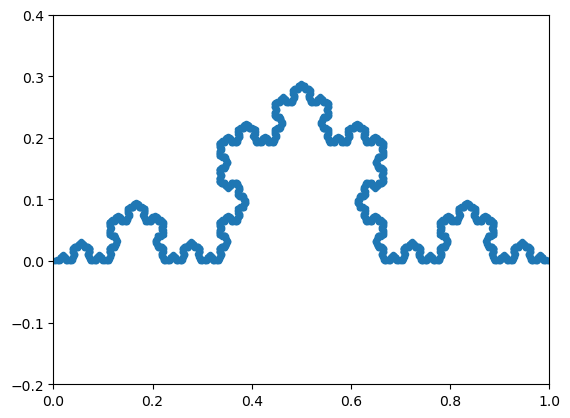

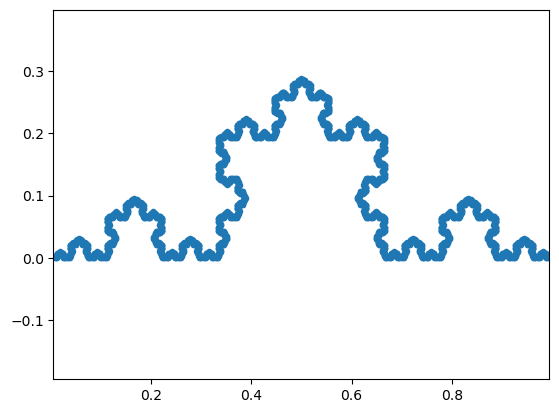

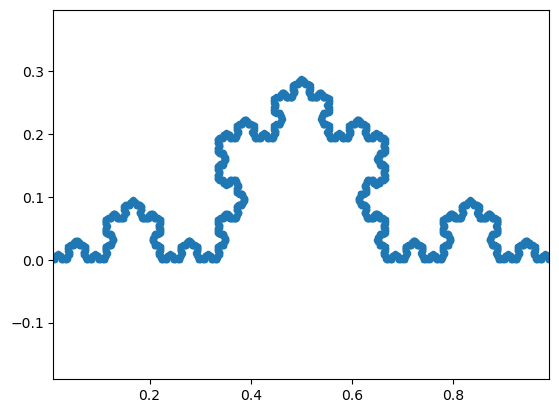

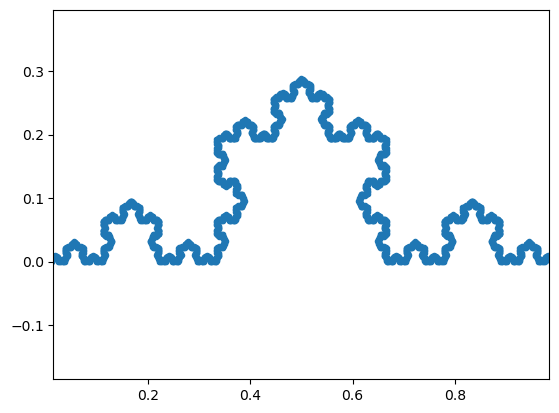

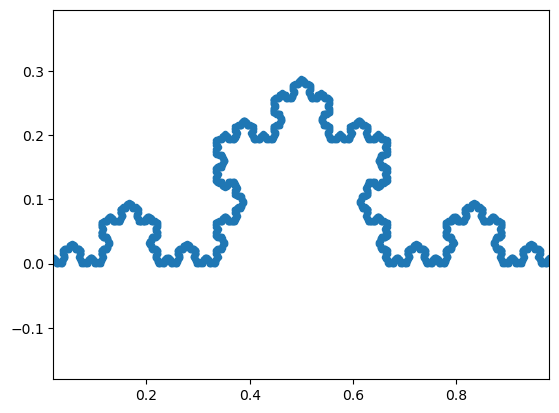

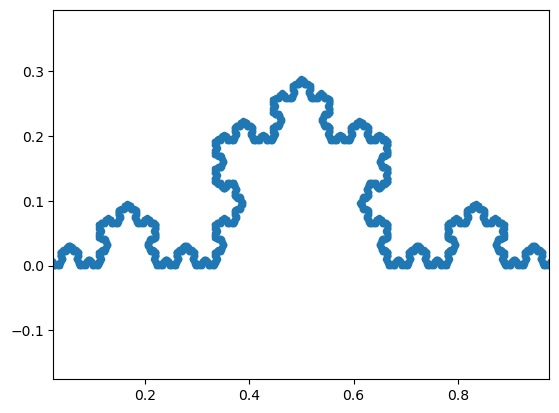

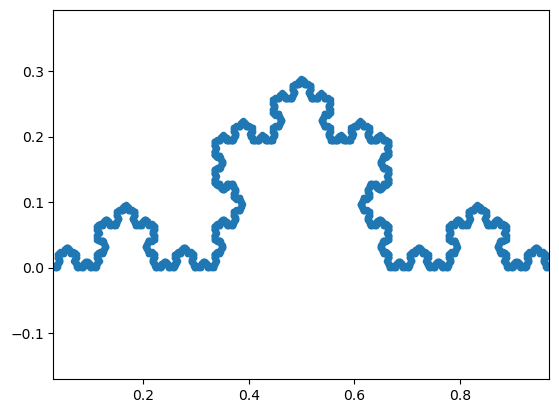

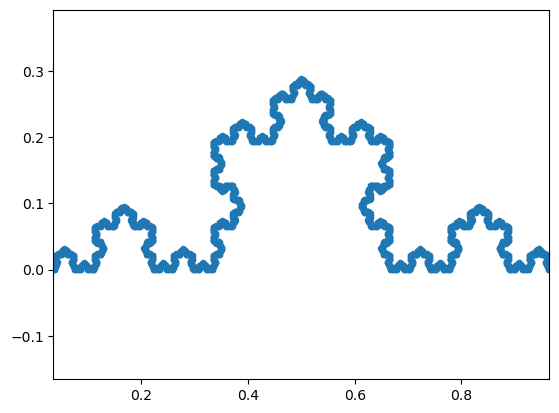

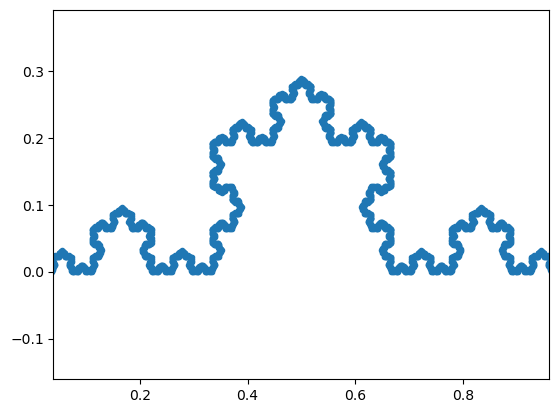

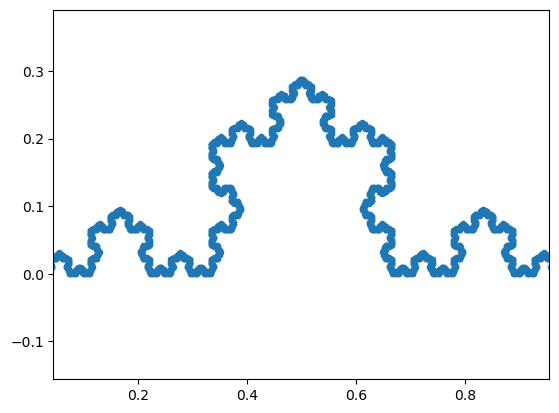

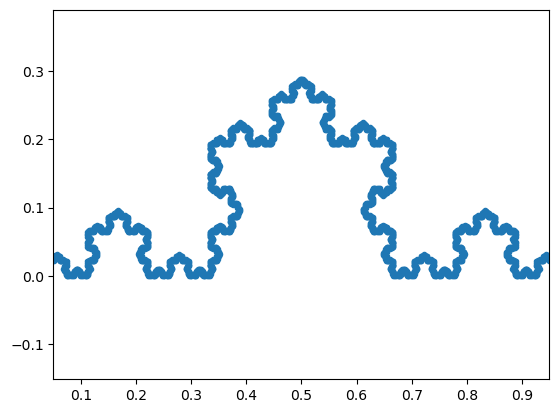

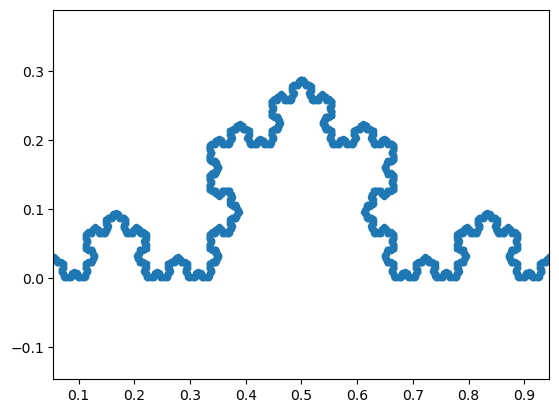

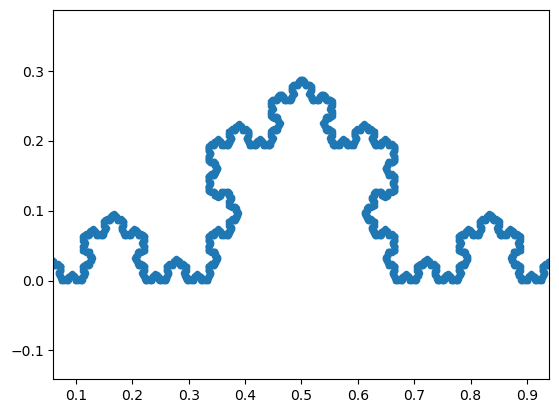

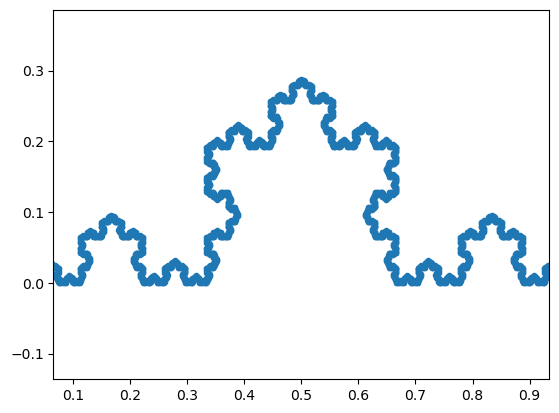

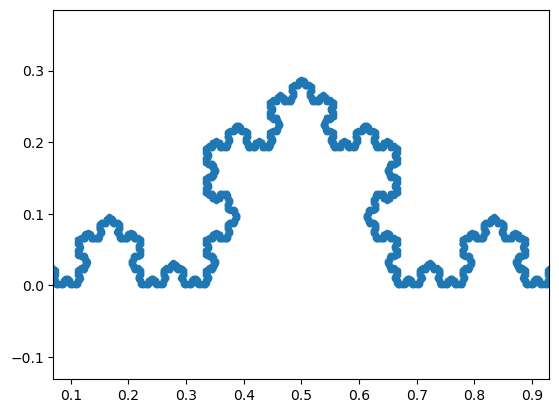

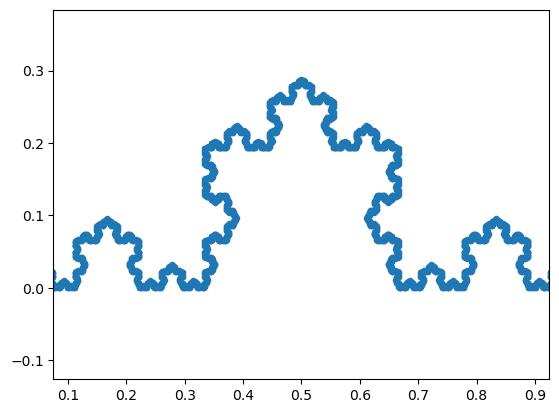

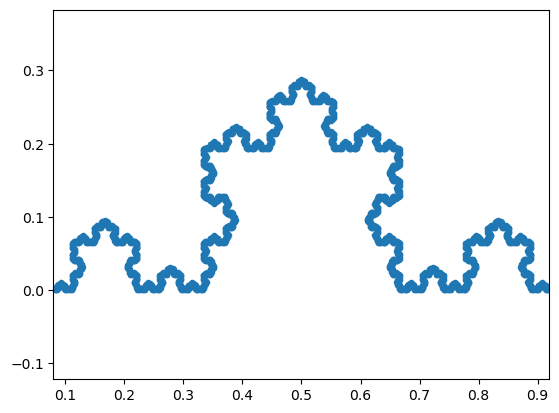

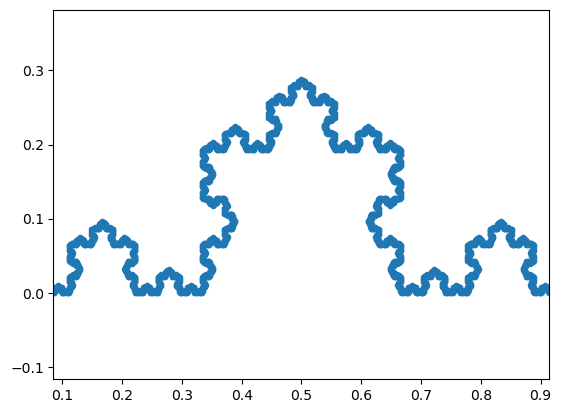

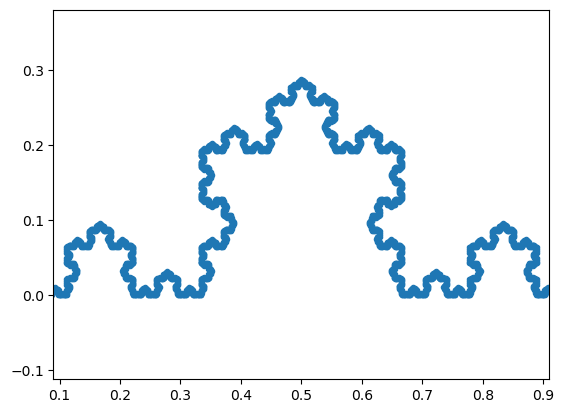

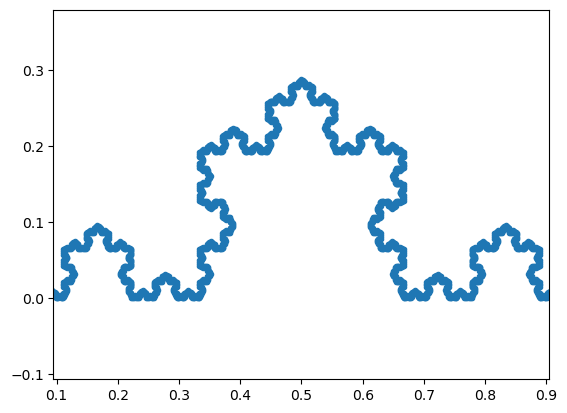

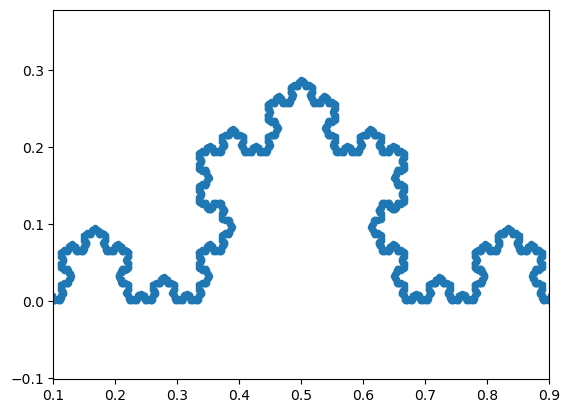

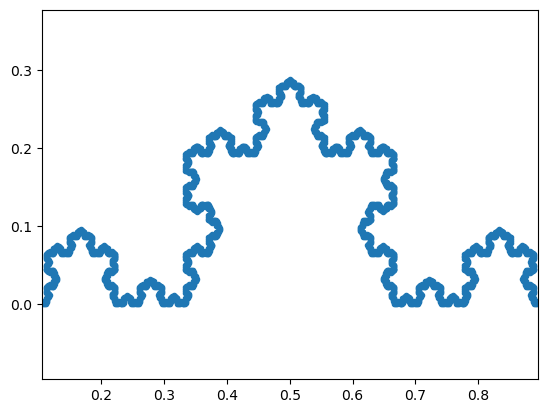

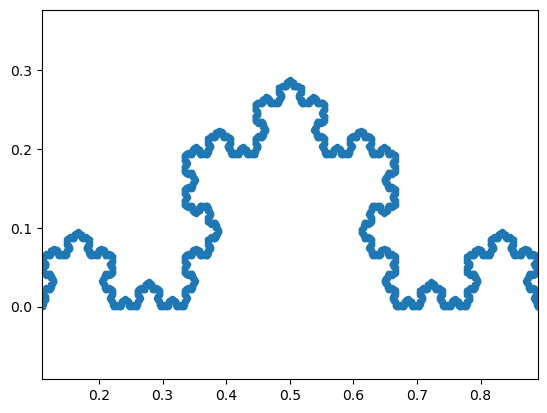

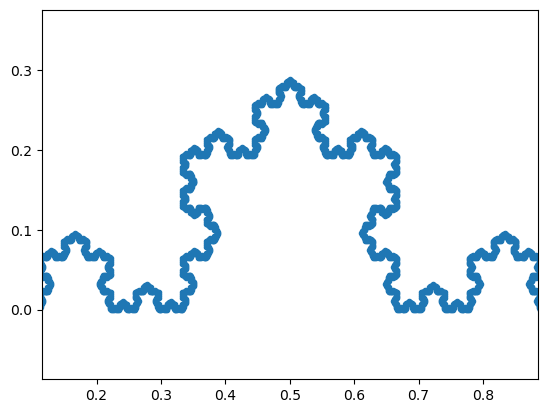

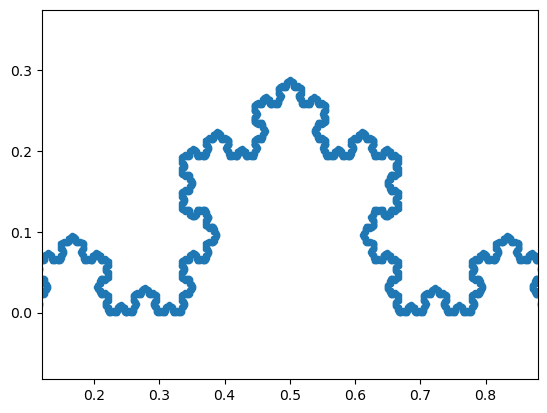

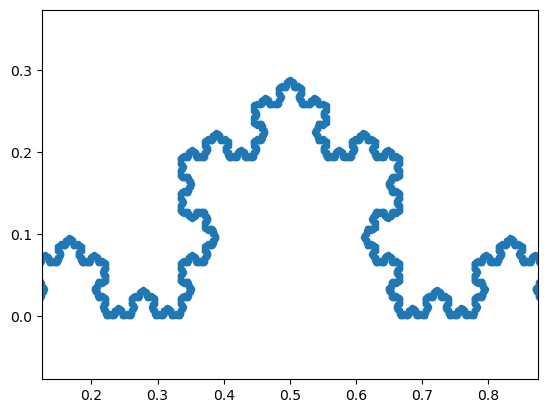

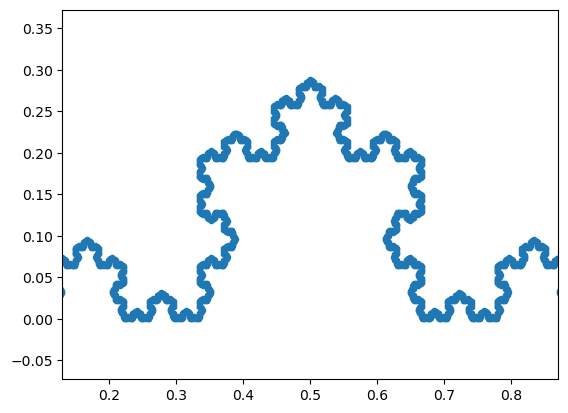

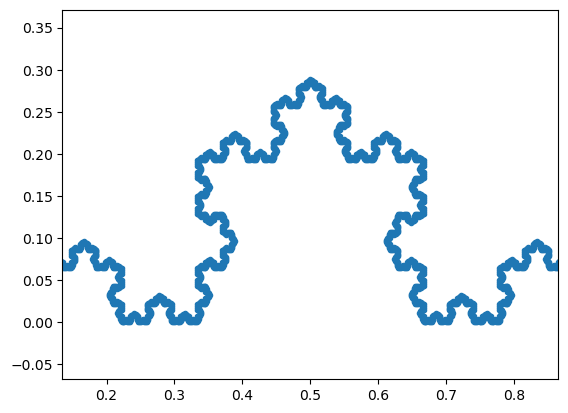

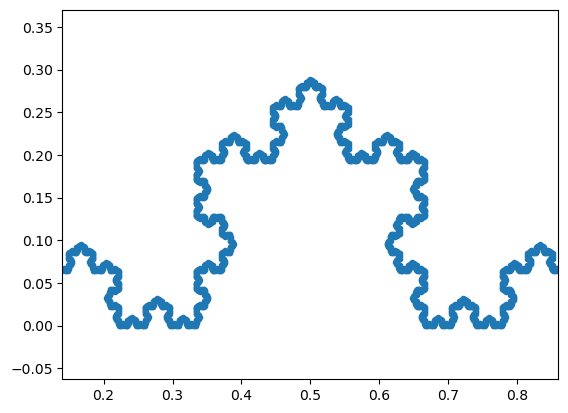

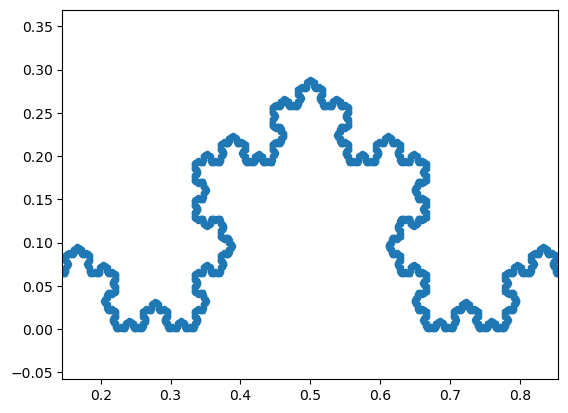

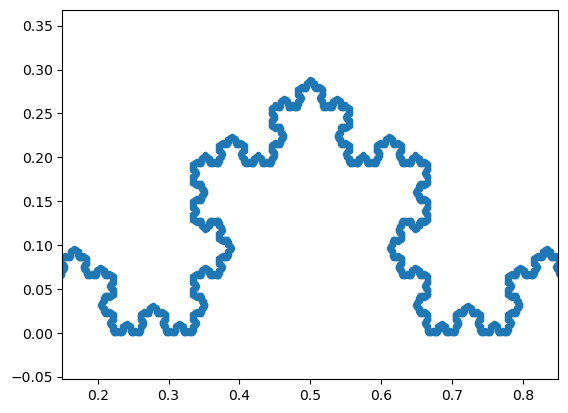

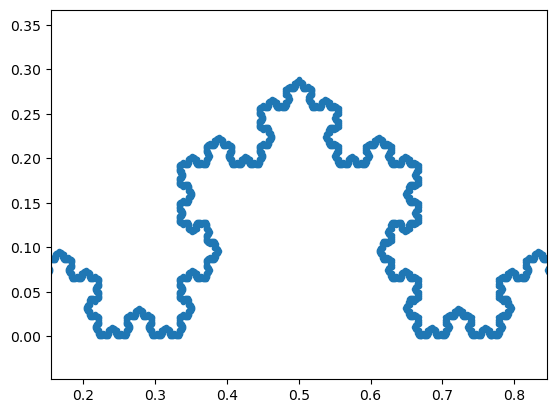

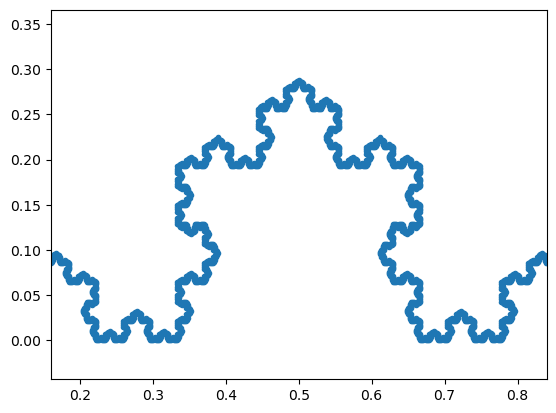

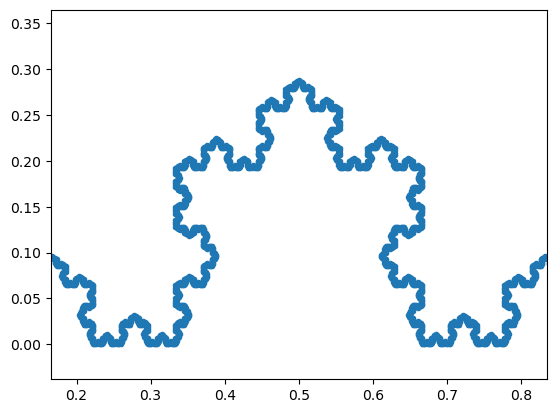

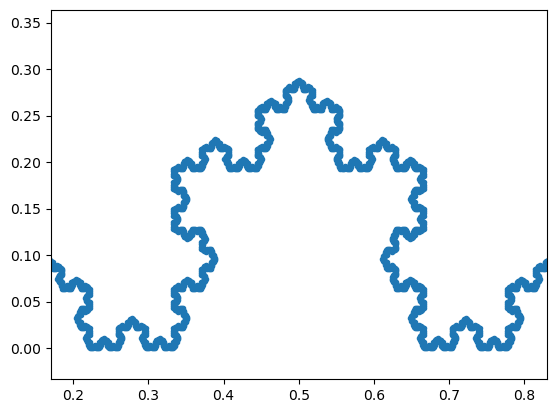

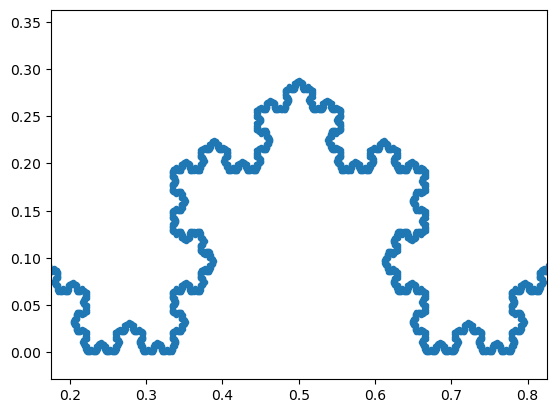

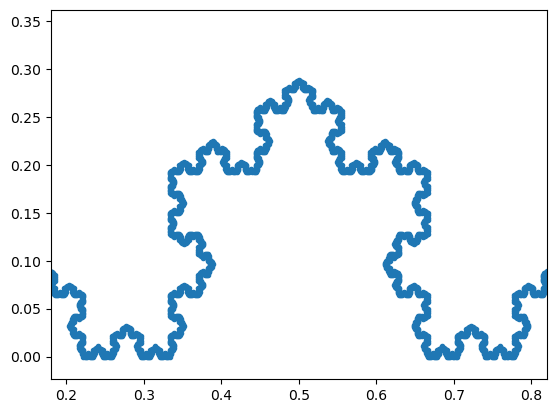

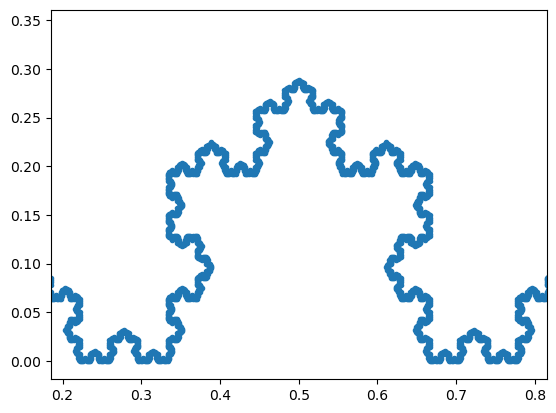

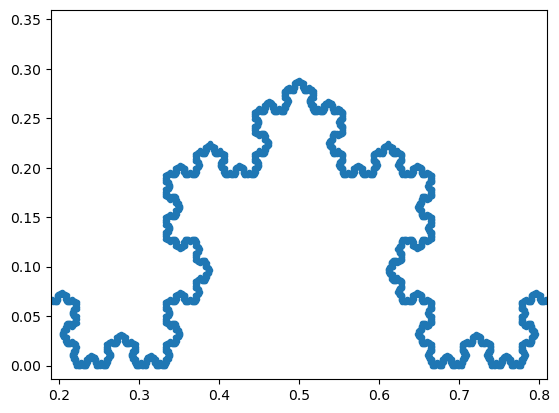

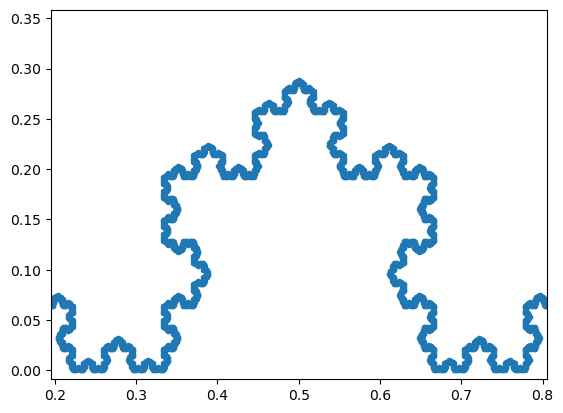

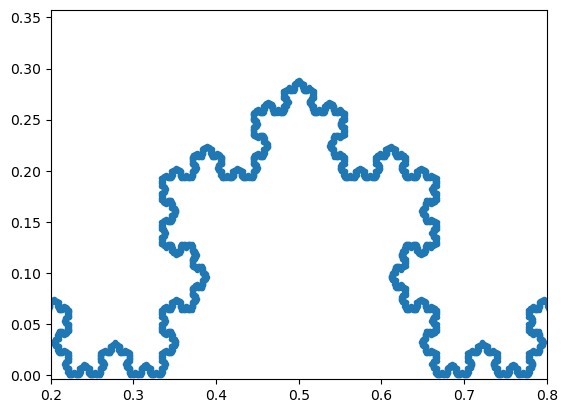

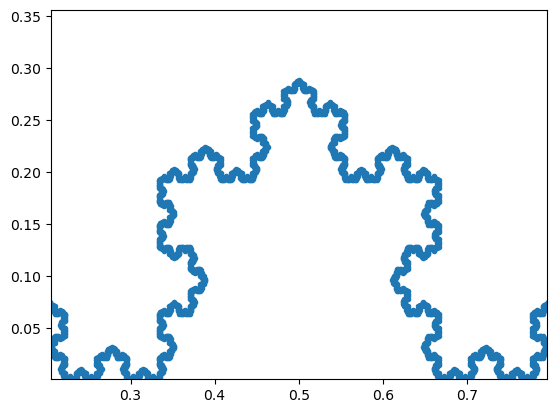

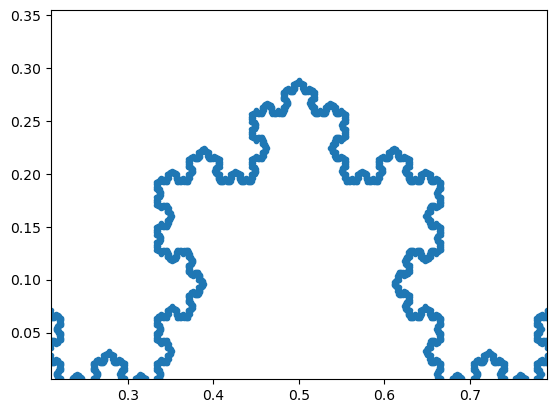

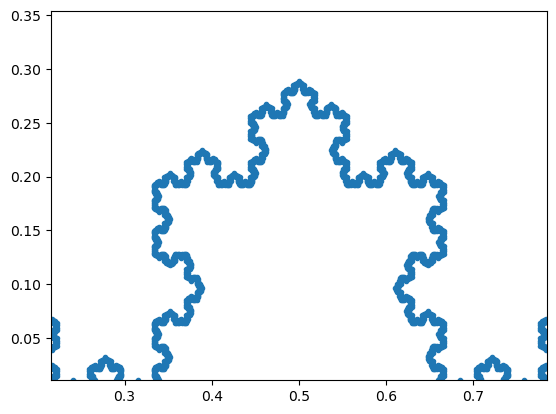

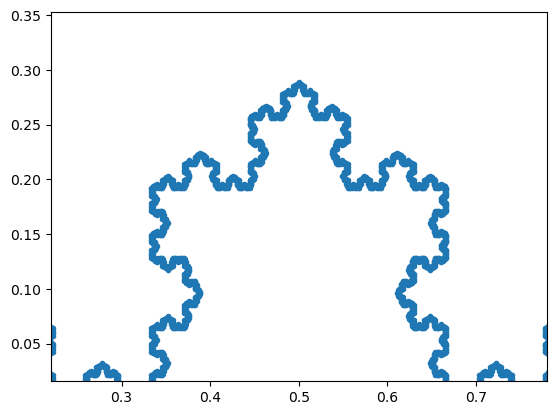

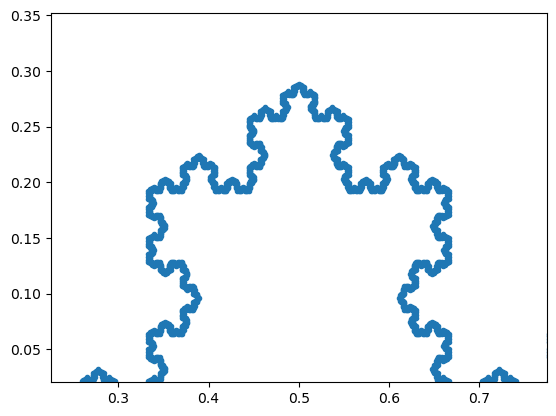

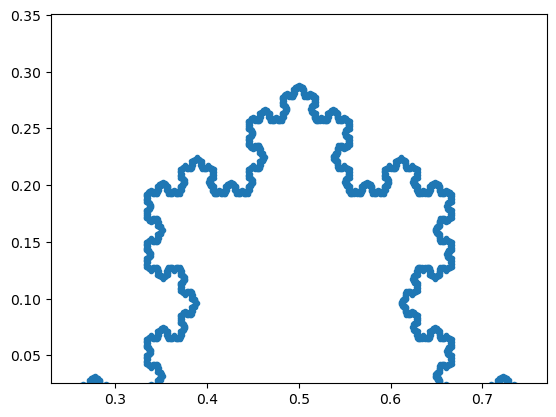

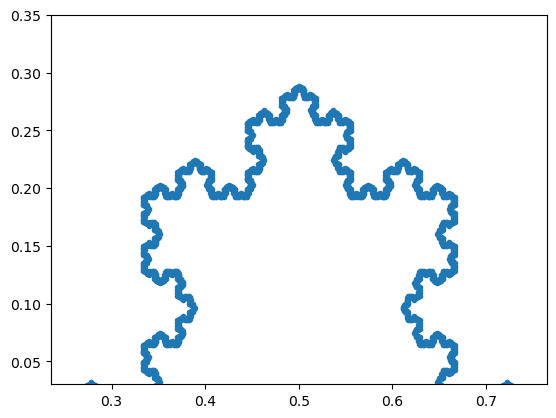

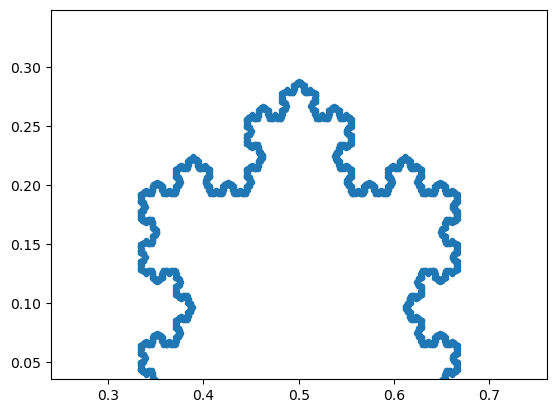

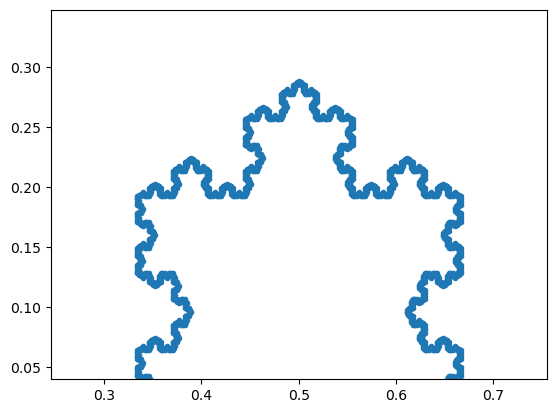

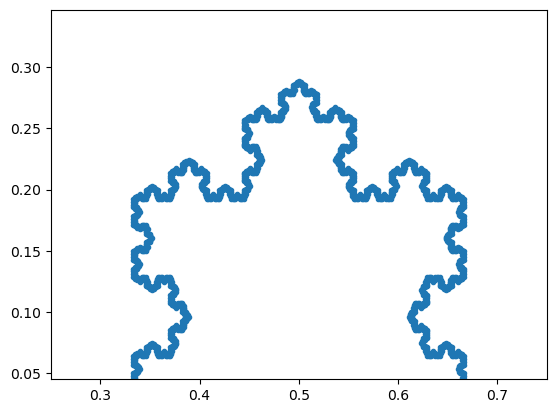

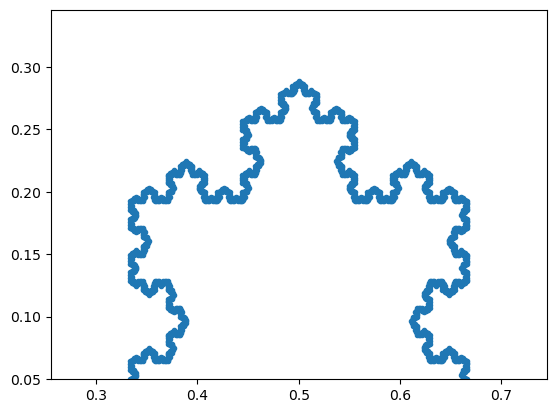

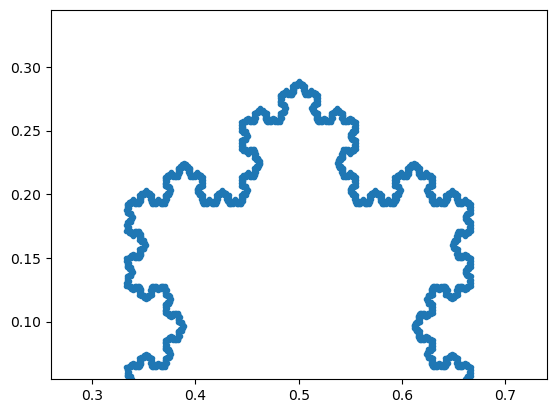

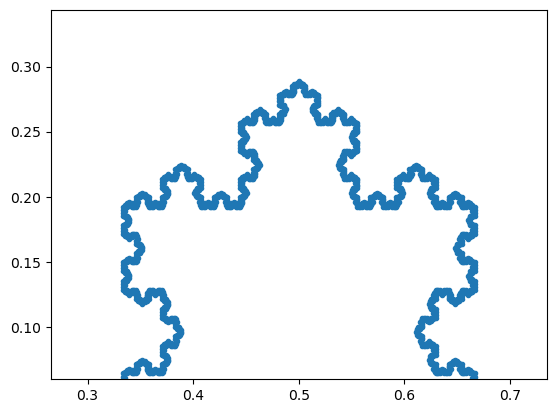

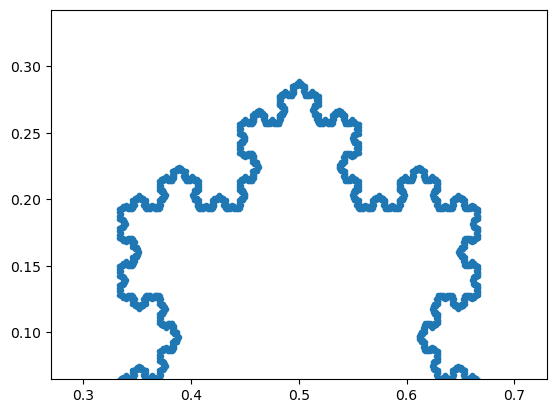

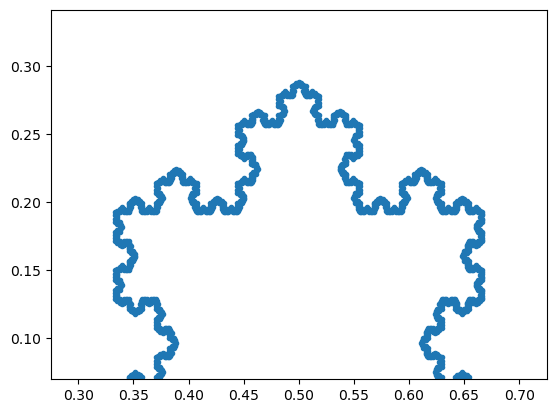

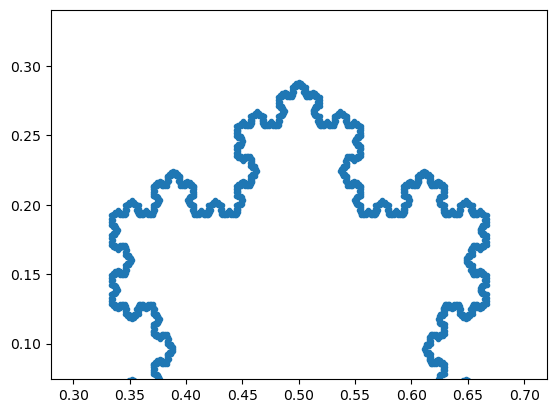

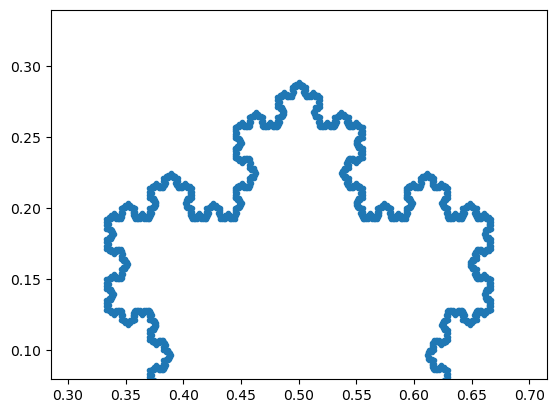

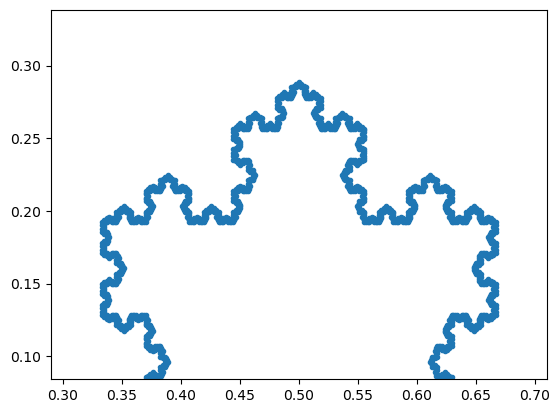

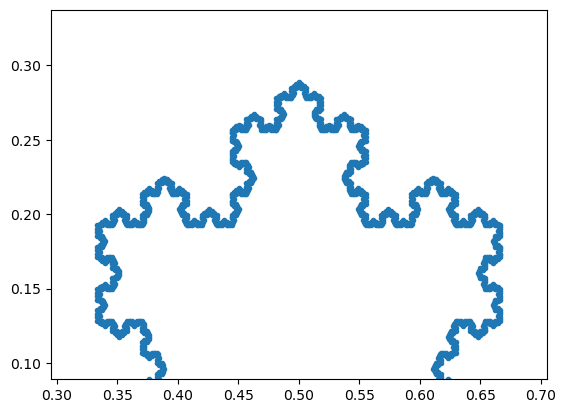

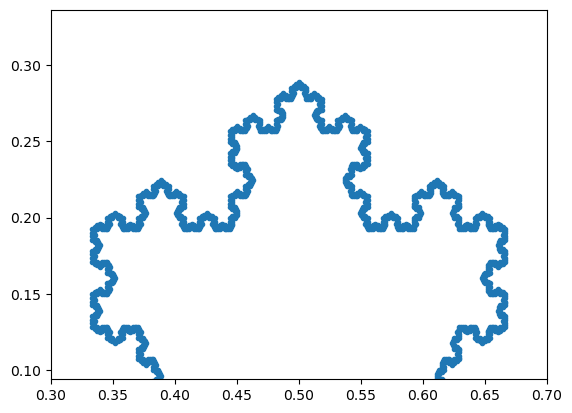

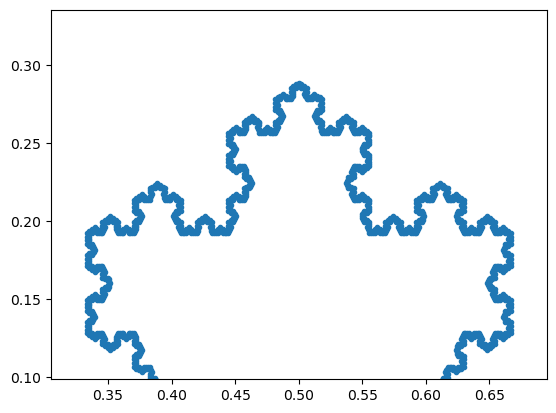

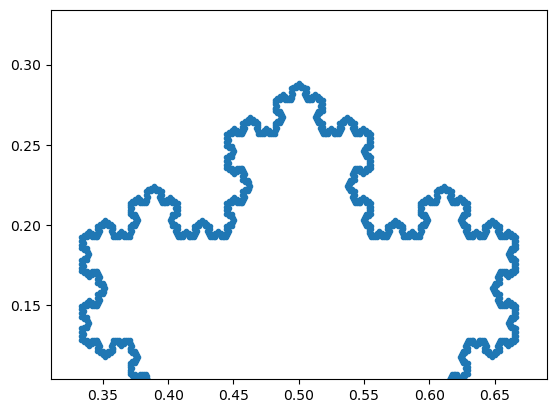

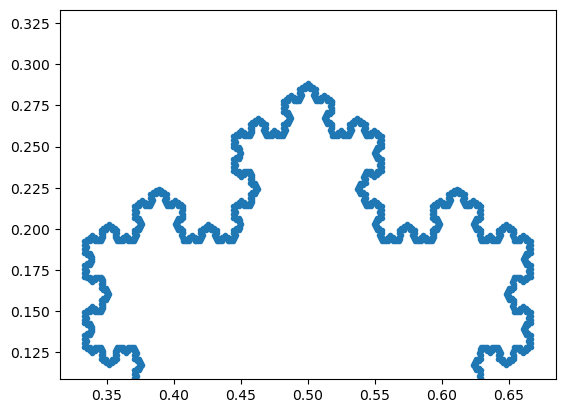

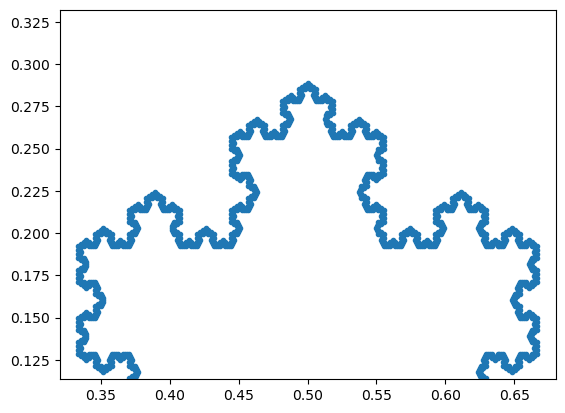

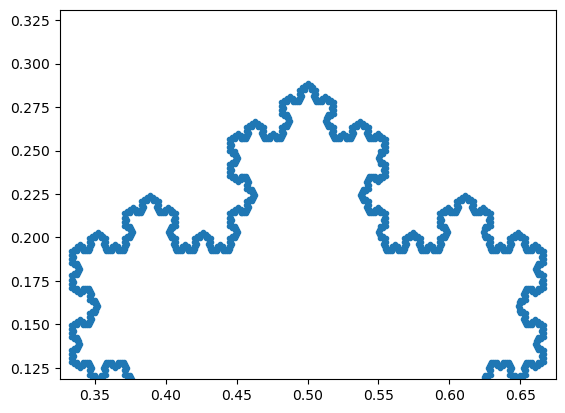

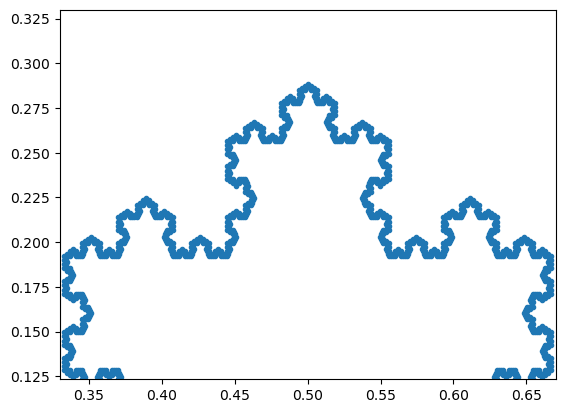

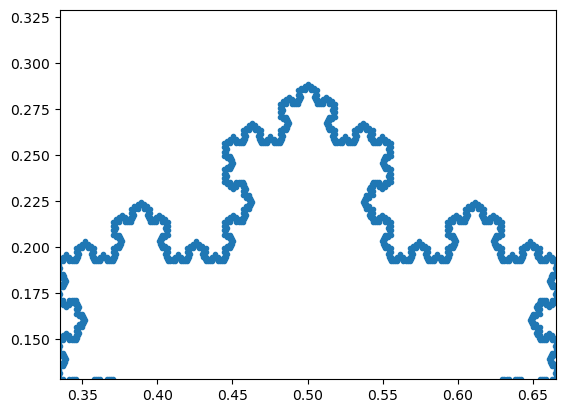

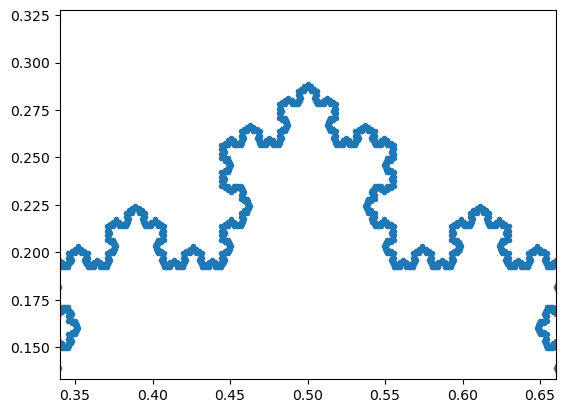

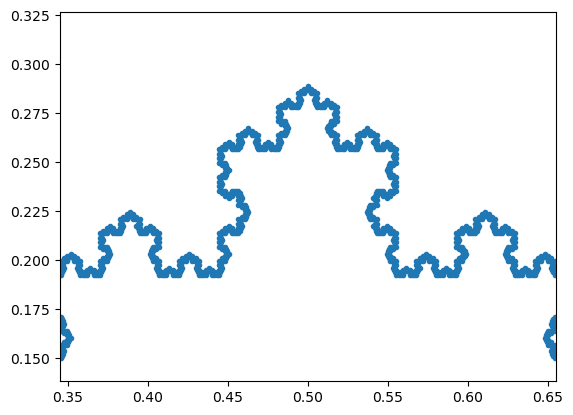

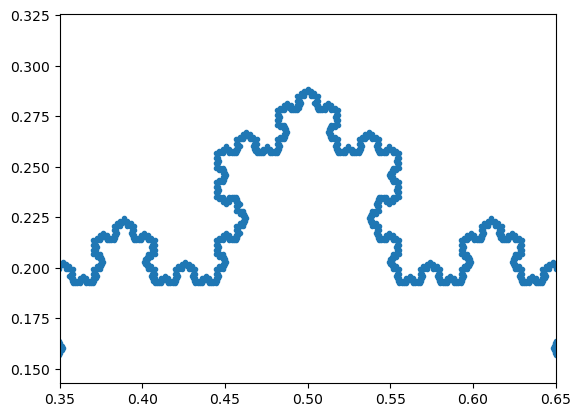

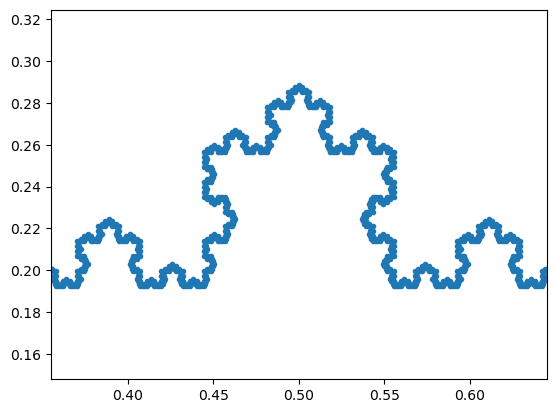

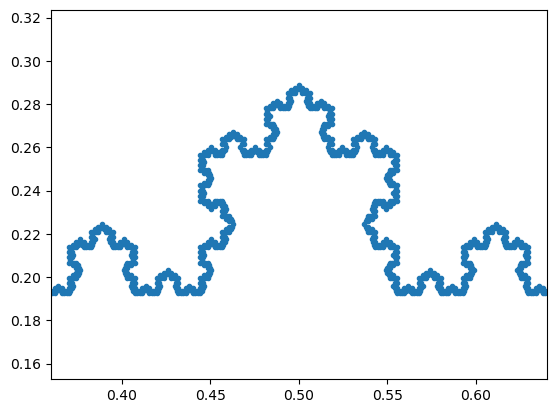

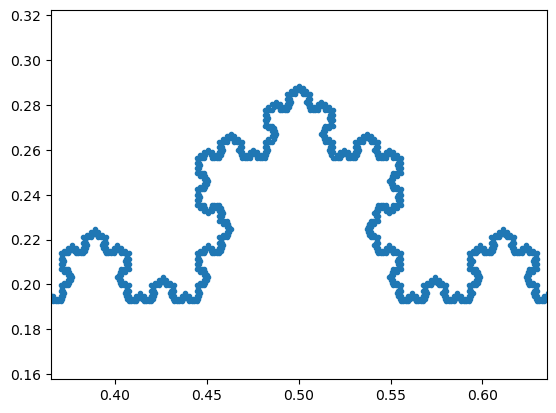

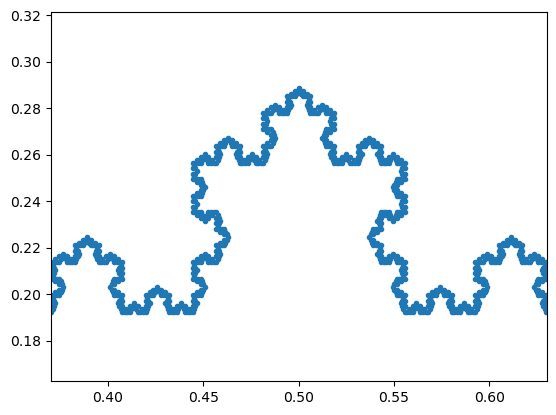

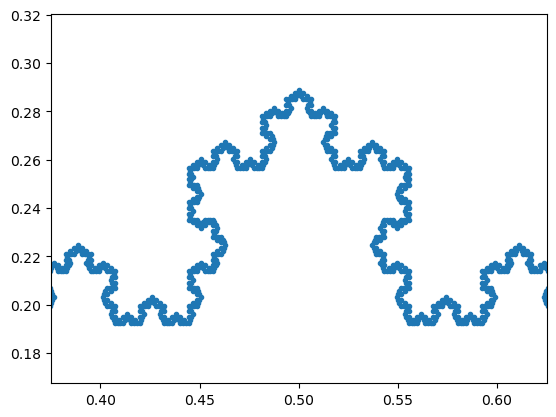

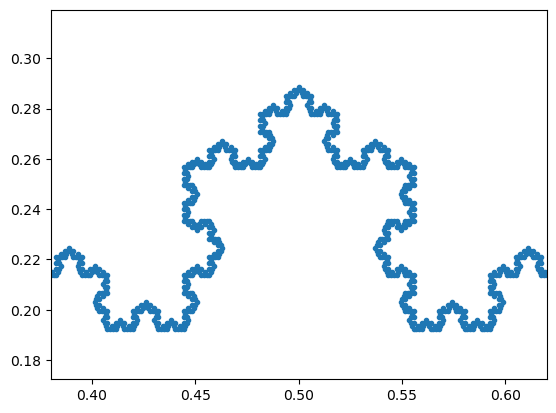

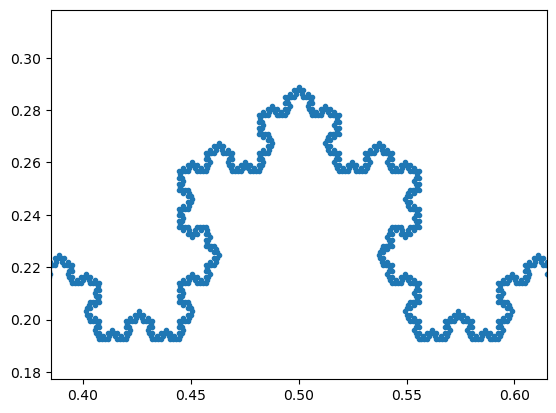

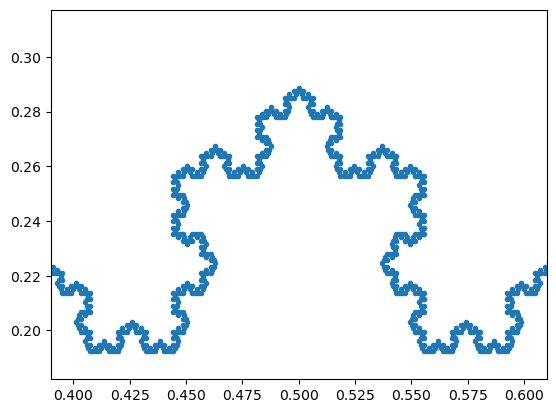

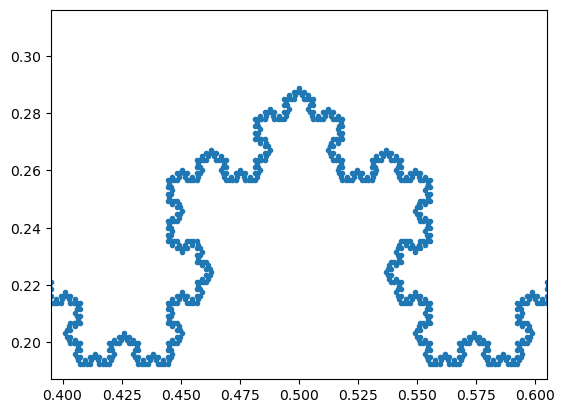

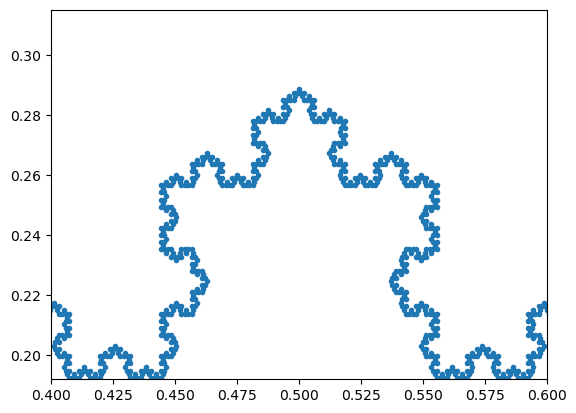

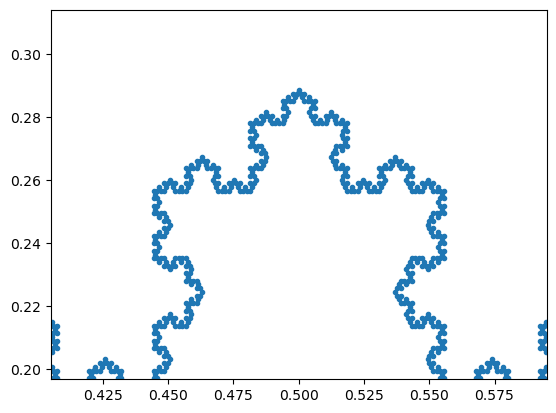

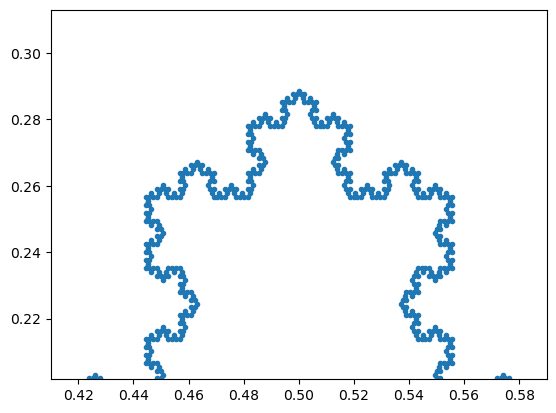

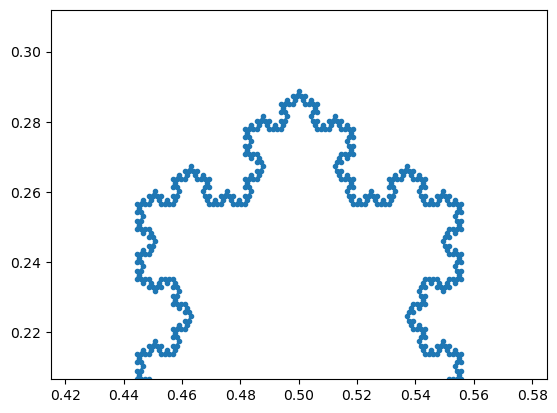

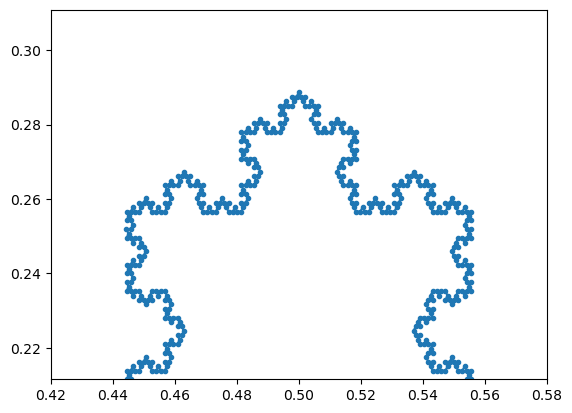

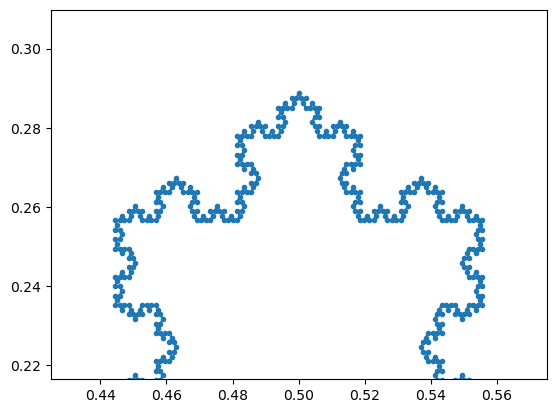

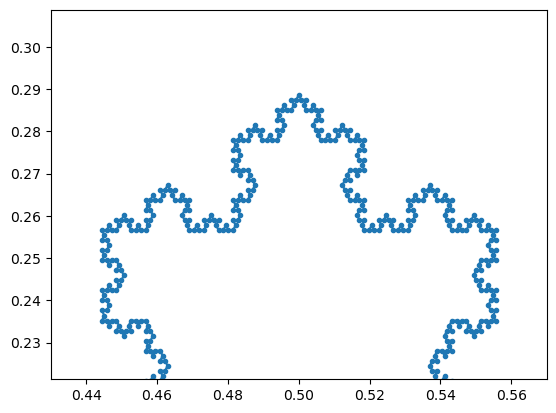

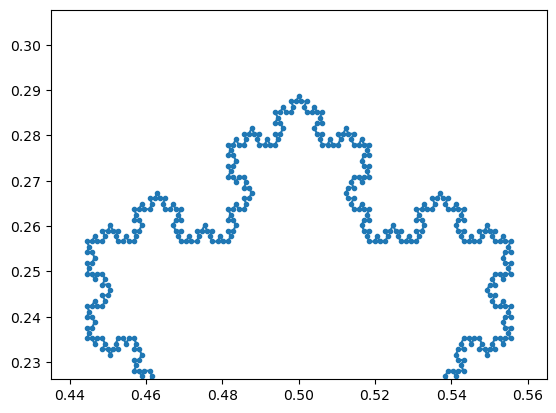

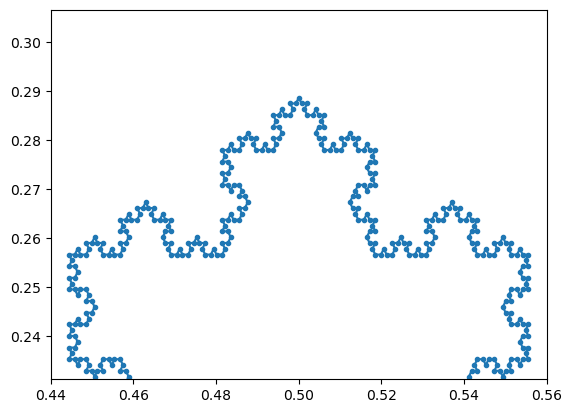

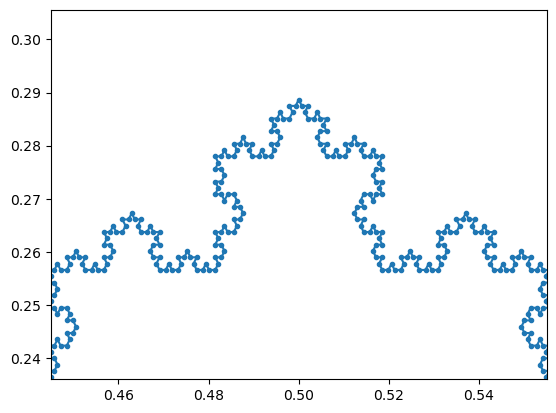

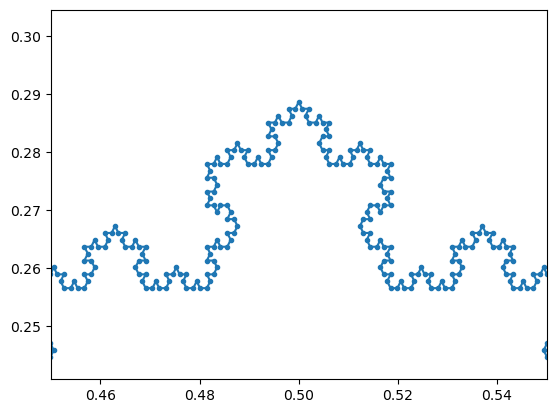

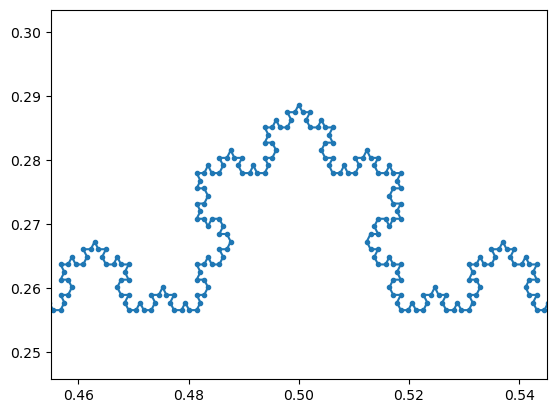

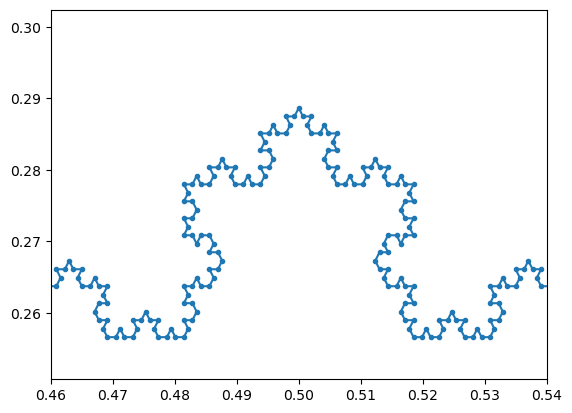

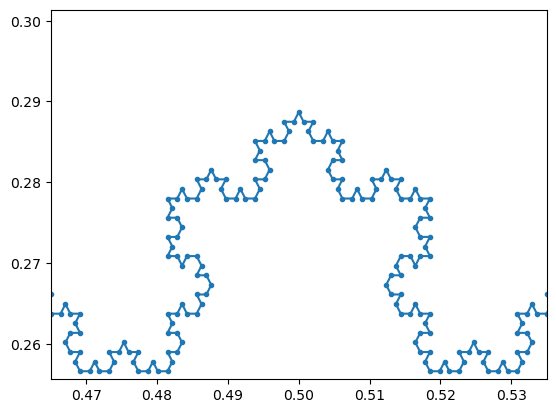

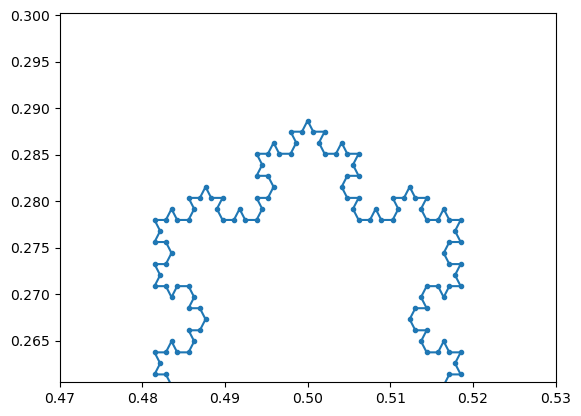

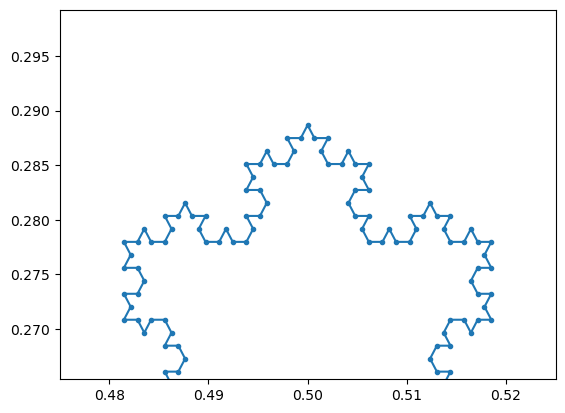

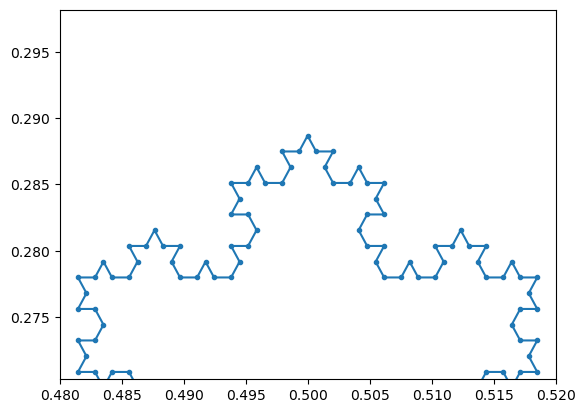

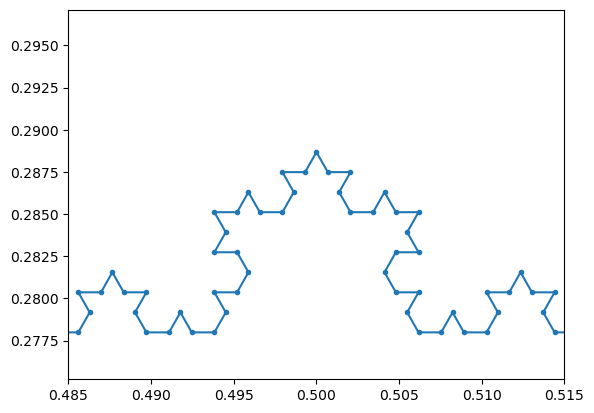

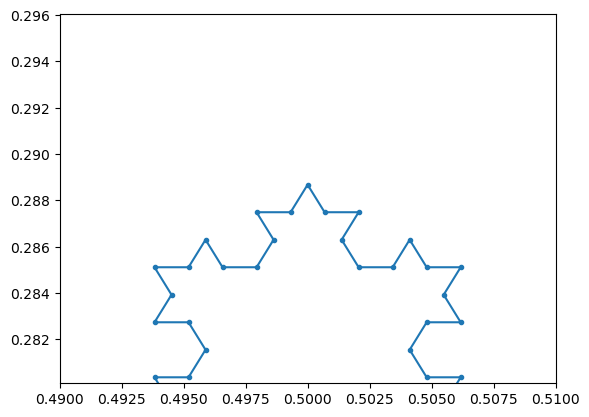

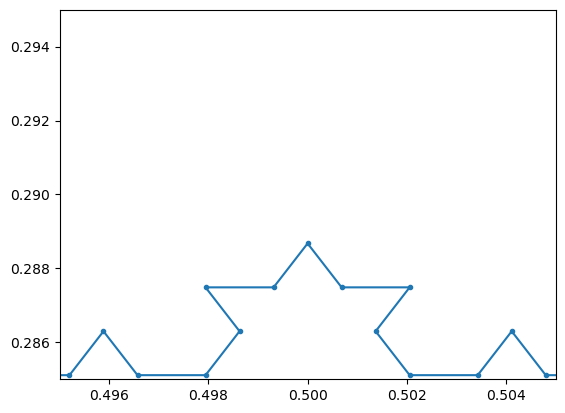

In [11]:
n=100
#plt.xlim([0,1])
#plt.ylim([-0.25,0.5])
xlim1 = np.linspace(0,0.495,n)
xlim2 = np.linspace(0.505,1,n)
ylim1 = np.linspace(-0.2,0.285,n)
ylim2 = np.linspace(0.295,0.4,n)
for i in range(len(xlim1)):
    plt.axis([xlim1[i],xlim2[-i-1],ylim1[i],ylim2[-i-1]])
    graf = plt.plot(kochcurve1(6)[0],kochcurve1(6)[1],".-")
    plt.savefig('kochcurveimagesd\kochcurve{:4d}.png'.format(i),dpi=300,orientation='portrait')
    plt.show()

In [20]:
import glob
from PIL import Image
def make_gif(frame_folder):
    frames = [Image.open(image) for image in glob.glob(f"{frame_folder}/*.png")]
    frame_one = frames[0]
    frame_one.save("my_awesome1.gif", format="GIF", append_images=frames,
               save_all=True, duration=100, loop=0)
    


In [ ]:
C:\Users\Bedirhan\PythonFile\Mywork\KochCurve

In [23]:
make_gif("/Users/Bedirhan/PythonFile/Mywork/KochCurve/kochcurveimagesd")

In [24]:
def kochcsnowflake(N,ix,fx,iy,fy):
    kocharrayx = [ix,fx]
    kocharrayy = [iy,fy]
    for times in range(N):
        linecount = len(kocharrayx)-1
        for j in range(linecount): # slide the line to 3 equal line 
            P1 = [kocharrayx[j+3*j],kocharrayy[j+3*j]]
            P4 = [kocharrayx[j+1+3*j],kocharrayy[j+1+3*j]]
            
            kocharrayx.insert(j+1+j*3,kochsplitp2(P1,P4)[0])#(np.sum([P4,P1],axis=0)/3
            kocharrayx.insert(j+2+j*3,kochsplitp4(P1,P4)[0])#((np.sum([P4,P1],axis=0)/3)*2)
            
            kocharrayy.insert(j+1+3*j,kochsplitp2(P1,P4)[1])#(np.sum([P4,P1],axis=0)/3)
            kocharrayy.insert(j+2+3*j,kochsplitp4(P1,P4)[1])#((np.sum([P4,P1],axis=0)/3)*2)
            
            newpointtriangle = rotatevector(kocharrayx[j+1+3*j],kocharrayx[j+2+3*j],kocharrayy[j+1+3*j],kocharrayy[j+2+3*j])    
            kocharrayx.insert(j+2+3*j,newpointtriangle[0])
            kocharrayy.insert(j+2+3*j,newpointtriangle[1])

    return kocharrayx,kocharrayy

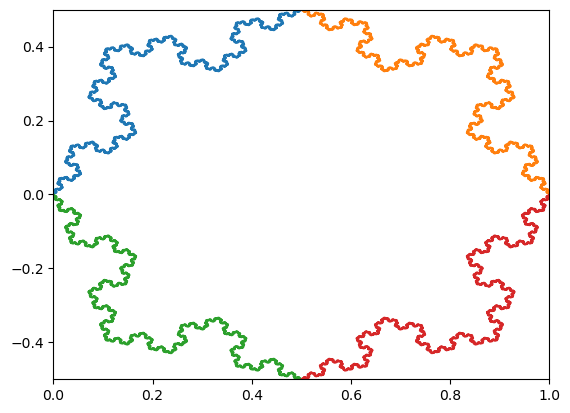

In [26]:
n=6
plt.plot(kochcsnowflake(n,0,0.5,0,0.5)[0],kochcsnowflake(n,0,0.5,0,0.5)[1])
plt.plot(kochcsnowflake(n,0.5,1,0.5,0)[0],kochcsnowflake(n,0.5,1,0.5,0)[1])
plt.plot(kochcsnowflake(n,0.5,0,-0.5,0)[0],kochcsnowflake(n,0.5,0,-0.5,0)[1])
plt.plot(kochcsnowflake(n,1,0.5,0,-0.5)[0],kochcsnowflake(n,1,0.5,0,-0.5)[1])
plt.axis([0,1,-0.5,0.5])
plt.savefig('kochsnowflake.png'.format(i),dpi=300,orientation='portrait')
plt.show()